In [2]:
# IST 718 Group Project - Recordable Incidents and Near Misses in the Workplace
# Kim Greene, Teng Siong Yeap, Brandon Croarkin, and Amanda Sausville

# import packages needed for analysis
from matplotlib.pylab import plt
%matplotlib inline
from nltk.tokenize import RegexpTokenizer
import pandas as pd  # data frame operations
from pandas import ExcelWriter
from pandas import ExcelFile
import pandasql as pdsql
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [3]:
#import dataset
Incidents = pd.read_excel('Incidents_and_NearMisses.xlsx', sheet_name='Sheet1')
incidentsDF = pd.DataFrame(Incidents)
incidentsDF.head()

,IncidentNo,IncidentType,CompanyName,Location,DateofOccurrence,YearofOccurrence,IncidentSummary,Area,IncidentDescription,InjuryDescripti,...,DaysonJobTransf,EmpIDCalc,InjustStatus,OccupationofInjured,OperationAtTimeofInjury,OSHARecordable,SBP,SOCCaption,SOCValue,MISS_PotentialImpact
0,130,Sprain,Company D,"Midland, TX",2013-04-21,2013,I.E. was pushing kelly hose off to the driller...,Rig Floor,I.E. was pushing kelly hose off to the driller...,contusions to those areas from slipping and st...,...,0,10711.0,First Aid,MOTOR_DRILLING,Rigging Down,0.0,Back (Lower),Texas,TX,NaN
1,131,Strain,Company D,"Rices Landing, PA",2013-04-05,2013,ee slipped on bottom step of stairs from mud t...,Stairs / Ladders,ee slipped on bottom step of stairs from mud t...,Strain to neck as a result of catching himself...,...,0,10713.0,First Aid,DERRICK_DRILLING,Well Control / BOP,0.0,Neck,West Virginia,WV,NaN
2,132,Strain,Company E,"Williston, ND",2013-04-18,2013,Ee was pulling back a stand of tubing while in...,Derrick / Mast,Ee was pulling back a stand of tubing while in...,Pain and stiffness in lower to middle right si...,...,0,21651.0,No Medical,DERRICK_WELL,Laying Down / Picking Up Pipe / Tubulars,0.0,Back (Lower),North Dakota,ND,NaN
3,136,Fracture,Company D,"Corpus Christi, TX",2013-04-04,2013,Ee's right ring fnger was caught between bushi...,Rig Floor,Ee's right ring fnger was caught between bushi...,Fracture of right ring finger as a result of f...,...,8,7025.0,Restricted Work Case,MOTOR_DRILLING,Making Connection,1.0,Finger,Texas,TX,NaN
4,138,Strain,Company E,"Williston, ND",2013-04-16,2013,Crew was rigging down the floor. Travis was li...,Rig Floor,Crew was rigging down the floor. Travis was li...,"Pain in upper back between shoulder blades, mo...",...,0,21065.0,First Aid,OPERATOR_WELL,Rigging Down,0.0,Back (Upper),North Dakota,ND,NaN


In [4]:
print(incidentsDF.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 23 columns):
IncidentNo                 3678 non-null int64
IncidentType               3678 non-null object
CompanyName                3678 non-null object
Location                   3678 non-null object
DateofOccurrence           3678 non-null datetime64[ns]
YearofOccurrence           3678 non-null int64
IncidentSummary            3678 non-null object
Area                       3678 non-null object
IncidentDescription        3678 non-null object
InjuryDescripti            1951 non-null object
DateHiredCalc              1952 non-null datetime64[ns]
YearsatCompany             3678 non-null float64
DaysAwayFromWor            3678 non-null int64
DaysonJobTransf            3678 non-null int64
EmpIDCalc                  1952 non-null float64
InjustStatus               1952 non-null object
OccupationofInjured        1944 non-null object
OperationAtTimeofInjury    1952 non-null object
OSHARecordable 

In [5]:
#Drop IncidentNo, IncidentSummary, InjuryDescripti
incidentsDF = incidentsDF.drop(['IncidentNo', 'IncidentSummary','InjuryDescripti'], axis=1)
incidentsDF.head()

,IncidentType,CompanyName,Location,DateofOccurrence,YearofOccurrence,Area,IncidentDescription,DateHiredCalc,YearsatCompany,DaysAwayFromWor,DaysonJobTransf,EmpIDCalc,InjustStatus,OccupationofInjured,OperationAtTimeofInjury,OSHARecordable,SBP,SOCCaption,SOCValue,MISS_PotentialImpact
0,Sprain,Company D,"Midland, TX",2013-04-21,2013,Rig Floor,I.E. was pushing kelly hose off to the driller...,2011-04-20,7.90,0,0,10711.0,First Aid,MOTOR_DRILLING,Rigging Down,0.0,Back (Lower),Texas,TX,NaN
1,Strain,Company D,"Rices Landing, PA",2013-04-05,2013,Stairs / Ladders,ee slipped on bottom step of stairs from mud t...,2011-09-14,7.49,0,0,10713.0,First Aid,DERRICK_DRILLING,Well Control / BOP,0.0,Neck,West Virginia,WV,NaN
2,Strain,Company E,"Williston, ND",2013-04-18,2013,Derrick / Mast,Ee was pulling back a stand of tubing while in...,2012-10-09,6.42,0,0,21651.0,No Medical,DERRICK_WELL,Laying Down / Picking Up Pipe / Tubulars,0.0,Back (Lower),North Dakota,ND,NaN
3,Fracture,Company D,"Corpus Christi, TX",2013-04-04,2013,Rig Floor,Ee's right ring fnger was caught between bushi...,2012-02-23,7.05,0,8,7025.0,Restricted Work Case,MOTOR_DRILLING,Making Connection,1.0,Finger,Texas,TX,NaN
4,Strain,Company E,"Williston, ND",2013-04-16,2013,Rig Floor,Crew was rigging down the floor. Travis was li...,2011-10-31,7.36,0,0,21065.0,First Aid,OPERATOR_WELL,Rigging Down,0.0,Back (Upper),North Dakota,ND,NaN


<Figure size 1440x720 with 0 Axes>

<BarContainer object of 21 artists>

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

Text(0.5, 1.0, 'Recordable Injuries by Incident Type')

Text(0.5, 0, 'Type')

Text(0, 0.5, 'Count')

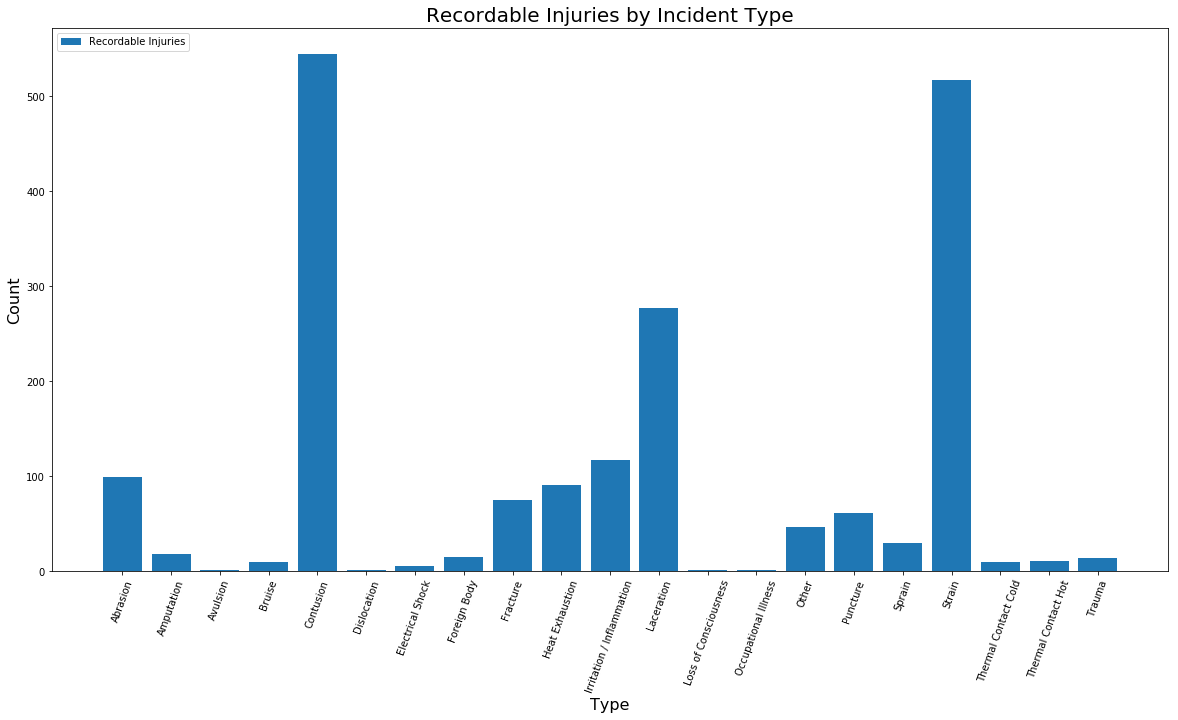

In [6]:
pysql = lambda q: pdsql.sqldf(q, globals())

# Create bar plot showing injuries by Incident Type
q = """SELECT IncidentType, Count(*) [Recordable Injuries] from incidentsDF where IncidentType <> 'Near Miss' group by IncidentType;"""
inctypeDF = pysql(q)

x = inctypeDF['IncidentType']
y= inctypeDF['Recordable Injuries']

plt.figure(figsize=(20,10))
plt.bar(x,y, label='Recordable Injuries')
locs, labels = plt.xticks()
plt.setp(labels, rotation=70)
plt.legend(loc='upper left')
plt.title('Recordable Injuries by Incident Type', fontsize=20)
plt.xlabel('Type', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.show()


In [7]:
#create dataframe showing injury trend by company

q = """SELECT distinct YearofOccurrence from incidentsDF order by YearofOccurrence;"""
yearsdf = pysql(q)

q = """SELECT CompanyName, count(*) [InjuryCount], YearofOccurrence from incidentsDF  group by CompanyName, YearofOccurrence order by YearofOccurrence;"""
trend1df = pysql(q)

q = """SELECT a.YearofOccurrence, CASE WHEN b.CompanyName='Company A' THEN InjuryCount Else 0 END [CompanyA] ,
        CASE WHEN b.CompanyName='Company B' THEN InjuryCount Else 0 END [CompanyB],
        CASE WHEN b.CompanyName='Company C' THEN InjuryCount Else 0 END [CompanyC],
        CASE WHEN b.CompanyName='Company D' THEN InjuryCount Else 0 END [CompanyD],
        CASE WHEN b.CompanyName='Company E' THEN InjuryCount Else 0 END [CompanyE],
        CASE WHEN b.CompanyName='Company F' THEN InjuryCount Else 0 END [CompanyF]
        FROM yearsdf a left join trend1df b on a.YearofOccurrence=b.YearofOccurrence;"""
trend2df = pysql(q)

q="""SELECT YearofOccurrence, SUM(CompanyA) [CompanyA], SUM(CompanyB) [CompanyB], SUM(CompanyC) [CompanyC],
        SUM(CompanyD) [CompanyD], SUM(CompanyE) [CompanyE], SUM(CompanyF) [CompanyF] from trend2df GROUP BY YearofOccurrence;"""
Trenddf = pysql(q)

#drop 2019 as it's not a complete year
Trenddf = Trenddf.drop(Trenddf[Trenddf.YearofOccurrence == 2019].index)
Trenddf

,YearofOccurrence,CompanyA,CompanyB,CompanyC,CompanyD,CompanyE,CompanyF
0,2013,6,6,23,443,151,71
1,2014,2,3,26,690,264,121
2,2015,0,2,27,215,138,70
3,2016,1,1,20,250,88,129
4,2017,0,3,17,140,90,156
5,2018,0,1,15,139,124,196


<Figure size 1440x720 with 0 Axes>

Text(0.5, 1.0, 'Annual Injury Count Trend by Company ')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Injury Count')

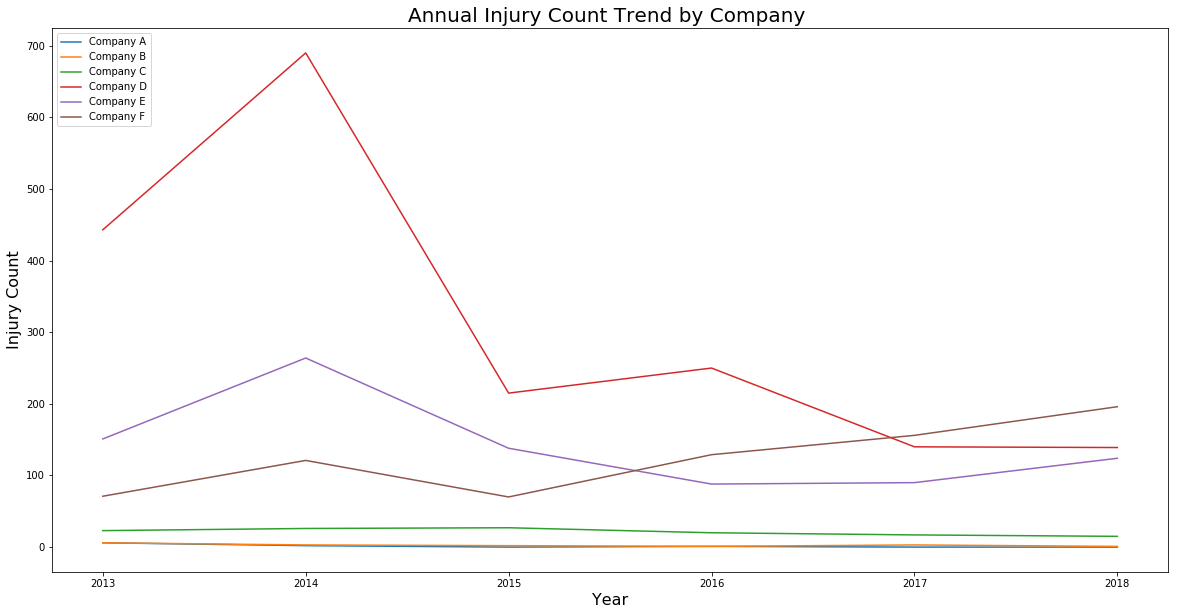

In [8]:
x = Trenddf['YearofOccurrence']
Y1 = Trenddf['CompanyA']
Y2 = Trenddf['CompanyB']
Y3 = Trenddf['CompanyC']
Y4 = Trenddf['CompanyD']
Y5 = Trenddf['CompanyE']
Y6 = Trenddf['CompanyF']

plt.figure(figsize=(20,10))
plt.plot(x,Y1, label='Company A')
plt.plot(x,Y2, label='Company B')
plt.plot(x,Y3, label='Company C')
plt.plot(x,Y4, label='Company D')
plt.plot(x,Y5, label='Company E')
plt.plot(x,Y6, label='Company F')

plt.legend(loc='upper left')
plt.title('Annual Injury Count Trend by Company ', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Injury Count', fontsize=16)
plt.show()


In [11]:
#separate Incident and near miss
nm = incidentsDF[incidentsDF['IncidentType'] == "Near Miss"]
nm.head()

,IncidentType,CompanyName,Location,DateofOccurrence,YearofOccurrence,Area,IncidentDescription,DateHiredCalc,YearsatCompany,DaysAwayFromWor,DaysonJobTransf,EmpIDCalc,InjustStatus,OccupationofInjured,OperationAtTimeofInjury,OSHARecordable,SBP,SOCCaption,SOCValue,MISS_PotentialImpact
95,Near Miss,Company F,"Billings, MT",2013-04-26 05:00:00,2013,Inland Wellsite,Incident occured when crane operator scoped ou...,NaT,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High Risk (HPI)
96,Near Miss,Company F,"Dickinson, ND",2013-05-02 05:00:00,2013,Inland Wellsite,Employee removed lubricator from wellhead befo...,NaT,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medium Risk
98,Near Miss,Company F,"Williston, ND",2013-05-04 05:00:00,2013,Inland Wellsite,While running power to the perforating trailer...,NaT,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High Risk (HPI)
100,Near Miss,Company F,"Dickinson, ND",2013-05-08 05:00:00,2013,Inland Wellsite,When pressure testing our lubricator we had le...,NaT,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medium Risk
125,Near Miss,Company E,"Conway, AR",2013-11-18 00:00:00,2013,Other (Specify),"While rigging up Scanalog equipment, the opera...",NaT,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High Risk (HPI)


In [12]:
inc = incidentsDF[incidentsDF['IncidentType'] != "Near Miss"]
inc.head()

,IncidentType,CompanyName,Location,DateofOccurrence,YearofOccurrence,Area,IncidentDescription,DateHiredCalc,YearsatCompany,DaysAwayFromWor,DaysonJobTransf,EmpIDCalc,InjustStatus,OccupationofInjured,OperationAtTimeofInjury,OSHARecordable,SBP,SOCCaption,SOCValue,MISS_PotentialImpact
0,Sprain,Company D,"Midland, TX",2013-04-21,2013,Rig Floor,I.E. was pushing kelly hose off to the driller...,2011-04-20,7.90,0,0,10711.0,First Aid,MOTOR_DRILLING,Rigging Down,0.0,Back (Lower),Texas,TX,NaN
1,Strain,Company D,"Rices Landing, PA",2013-04-05,2013,Stairs / Ladders,ee slipped on bottom step of stairs from mud t...,2011-09-14,7.49,0,0,10713.0,First Aid,DERRICK_DRILLING,Well Control / BOP,0.0,Neck,West Virginia,WV,NaN
2,Strain,Company E,"Williston, ND",2013-04-18,2013,Derrick / Mast,Ee was pulling back a stand of tubing while in...,2012-10-09,6.42,0,0,21651.0,No Medical,DERRICK_WELL,Laying Down / Picking Up Pipe / Tubulars,0.0,Back (Lower),North Dakota,ND,NaN
3,Fracture,Company D,"Corpus Christi, TX",2013-04-04,2013,Rig Floor,Ee's right ring fnger was caught between bushi...,2012-02-23,7.05,0,8,7025.0,Restricted Work Case,MOTOR_DRILLING,Making Connection,1.0,Finger,Texas,TX,NaN
4,Strain,Company E,"Williston, ND",2013-04-16,2013,Rig Floor,Crew was rigging down the floor. Travis was li...,2011-10-31,7.36,0,0,21065.0,First Aid,OPERATOR_WELL,Rigging Down,0.0,Back (Upper),North Dakota,ND,NaN


In [13]:
#this function will take a column variable, concatenate all the injury descriptions, apply stop words
#and generate a word cloud
def myCloud (description):
    text = " ".join(desc for desc in description)
    print ("There are {} words in the combination of all description.".format(len(text)))
    
    # Create stopword list:
    stopwords = set(STOPWORDS)
    stopwords.update(["employee","EE","IE"])
    
    # Generate a word cloud image
    wordcloud = WordCloud(stopwords=stopwords,  max_words=50, background_color="white").generate(text)
    
    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

There are 324238 words in the combination of all description.


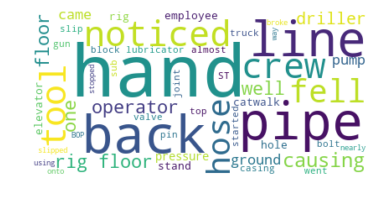

There are 511929 words in the combination of all description.


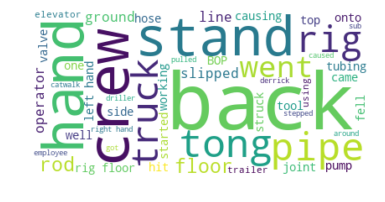

In [15]:
#word cloud for Near Miss
myCloud(nm.IncidentDescription)

#word cloud for Incident
myCloud(inc.IncidentDescription)

In [16]:
#create a term document matrix

#make InjuryDescription to become a list
doc = incidentsDF.IncidentDescription.tolist()
doc[:5]

#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')

vec = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
X = vec.fit_transform(doc)

tdm = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())
tdm.shape

['I.E. was pushing kelly hose off to the driller side of the rig floor (Rig-Down operation) when he stepped back, his left foot went through a unguarded opening in the rig floor, where the rat-hole chuck sets.',
 'ee slipped on bottom step of stairs from mud tanks, caught himself with right arm and his neck was strained.',
 'Ee was pulling back a stand of tubing while in derrick and felt a burning pain in his back on the lower to middle right side.',
 "Ee's right ring fnger was caught between bushing puller and drill pipe.",
 'Crew was rigging down the floor. Travis was lifting disconnected hydraulic hoses up in front of him till about shoulder level. He felt a sharp pain under his left shoulder blade in the spine region.']

(3678, 5634)

In [17]:
tdm.head()

,0,00,000,00pm,01,02,03,0300,04,05,...,yolk,zac,zack,zep,zero,zeroes,zinc,zip,zipper,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
#merge incidentsDF and tdm
df_merged = incidentsDF.merge(tdm, how='outer', left_index=True, right_index=True)
df_merged.head()

,IncidentType,CompanyName,Location,DateofOccurrence,YearofOccurrence,Area,IncidentDescription,DateHiredCalc,YearsatCompany,DaysAwayFromWor,...,yolk,zac,zack,zep,zero,zeroes,zinc,zip,zipper,zone
0,Sprain,Company D,"Midland, TX",2013-04-21,2013,Rig Floor,I.E. was pushing kelly hose off to the driller...,2011-04-20,7.90,0,...,0,0,0,0,0,0,0,0,0,0
1,Strain,Company D,"Rices Landing, PA",2013-04-05,2013,Stairs / Ladders,ee slipped on bottom step of stairs from mud t...,2011-09-14,7.49,0,...,0,0,0,0,0,0,0,0,0,0
2,Strain,Company E,"Williston, ND",2013-04-18,2013,Derrick / Mast,Ee was pulling back a stand of tubing while in...,2012-10-09,6.42,0,...,0,0,0,0,0,0,0,0,0,0
3,Fracture,Company D,"Corpus Christi, TX",2013-04-04,2013,Rig Floor,Ee's right ring fnger was caught between bushi...,2012-02-23,7.05,0,...,0,0,0,0,0,0,0,0,0,0
4,Strain,Company E,"Williston, ND",2013-04-16,2013,Rig Floor,Crew was rigging down the floor. Travis was li...,2011-10-31,7.36,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
#create a new column named "Label". If the IncidentType is NOT "Near Miss", change it to "Incident"
df_merged['Label'] = df_merged['IncidentType']
df_merged['Label'] = ['Near Miss' if x == 'Near Miss' else 'Incident' for x in df_merged['Label']]
df_merged.head()
df_merged.tail()

,IncidentType,CompanyName,Location,DateofOccurrence,YearofOccurrence,Area,IncidentDescription,DateHiredCalc,YearsatCompany,DaysAwayFromWor,...,zac,zack,zep,zero,zeroes,zinc,zip,zipper,zone,Label
0,Sprain,Company D,"Midland, TX",2013-04-21,2013,Rig Floor,I.E. was pushing kelly hose off to the driller...,2011-04-20,7.90,0,...,0,0,0,0,0,0,0,0,0,Incident
1,Strain,Company D,"Rices Landing, PA",2013-04-05,2013,Stairs / Ladders,ee slipped on bottom step of stairs from mud t...,2011-09-14,7.49,0,...,0,0,0,0,0,0,0,0,0,Incident
2,Strain,Company E,"Williston, ND",2013-04-18,2013,Derrick / Mast,Ee was pulling back a stand of tubing while in...,2012-10-09,6.42,0,...,0,0,0,0,0,0,0,0,0,Incident
3,Fracture,Company D,"Corpus Christi, TX",2013-04-04,2013,Rig Floor,Ee's right ring fnger was caught between bushi...,2012-02-23,7.05,0,...,0,0,0,0,0,0,0,0,0,Incident
4,Strain,Company E,"Williston, ND",2013-04-16,2013,Rig Floor,Crew was rigging down the floor. Travis was li...,2011-10-31,7.36,0,...,0,0,0,0,0,0,0,0,0,Incident


,IncidentType,CompanyName,Location,DateofOccurrence,YearofOccurrence,Area,IncidentDescription,DateHiredCalc,YearsatCompany,DaysAwayFromWor,...,zac,zack,zep,zero,zeroes,zinc,zip,zipper,zone,Label
3673,Near Miss,Company F,"Williston, ND",2019-02-06,2019,Shop,Employee was walking in the PCE of shop with e...,NaT,0.0,0,...,0,0,0,0,0,0,0,0,0,Near Miss
3674,Near Miss,Company F,"Brighton, CO",2019-02-07,2019,Vehicle,"While driving to meet co-workers, employee was...",NaT,0.0,0,...,0,0,0,0,0,0,0,0,0,Near Miss
3675,Near Miss,Company D,"Howard, TX",2019-02-12,2019,Derrick / Mast,On top drive inspection the stabbing guide had...,NaT,0.0,0,...,0,0,0,0,0,0,0,0,0,Near Miss
3676,Near Miss,Company D,"Reeves, TX",2019-02-11,2019,Rig Floor,"While rigging up cementers, C & J cementers em...",NaT,0.0,0,...,0,0,0,0,0,0,1,0,0,Near Miss
3677,Near Miss,Company D,"Reeves, TX",2019-02-03,2019,Water / Fuel Storage Tank,Employee was walking backwards on the water ta...,NaT,0.0,0,...,0,0,0,0,0,0,0,0,0,Near Miss
